Accuracy: 0.8421052631578947


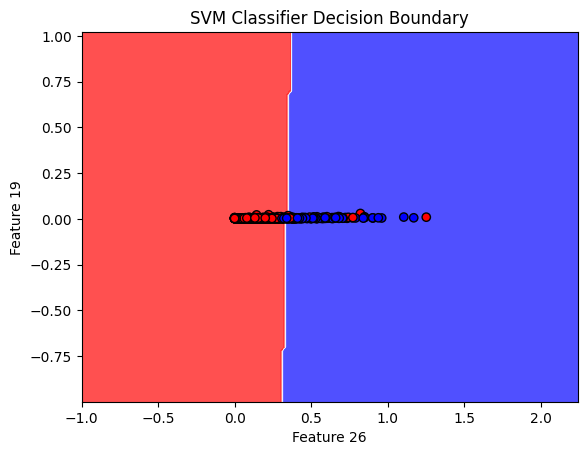

In [5]:
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

# Load the breast cancer dataset
dataset = load_breast_cancer()

# Randomly select two feature indices
feature1_index = random.randint(0, 30)
feature2_index = random.randint(0, 30)

# Extract the selected features and target variable
X = dataset.data[:, [feature1_index, feature2_index]]
y = dataset.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear SVM classifier
svm_classifier = LinearSVC(loss="hinge", random_state=0)
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot the decision boundary
h = 0.02  # Step size in the meshgrid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = svm_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and data points
plt.contourf(xx, yy, Z, alpha=0.8, cmap='bwr')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k')

# Set labels and title
plt.xlabel('Feature ' + str(feature1_index))
plt.ylabel('Feature ' + str(feature2_index))
plt.title('SVM Classifier Decision Boundary')

# Display the plot
plt.show()
